# クラスタリング分析
- 特異なデータを列挙する際に使用できる

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [6]:
df_iris = pd.read_csv('./data/raw/iris.csv')
df_iris_no_label = df_iris.drop('species', axis=1)

In [35]:
print(df_iris.shape)
df_iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
print(df_iris_no_label.shape)
df_iris_no_label.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 正解クラスタ

In [8]:
pca = PCA(n_components=2)
pca.fit(df_iris.iloc[:,0:4].values)
df_iris_pca = pd.DataFrame(np.dot(df_iris.iloc[:,0:4].values, pca.components_.T), columns=['comp_1', 'comp_2'])
df_iris_pca = pd.concat([df_iris_pca, pd.DataFrame(df_iris['species'])], axis=1)

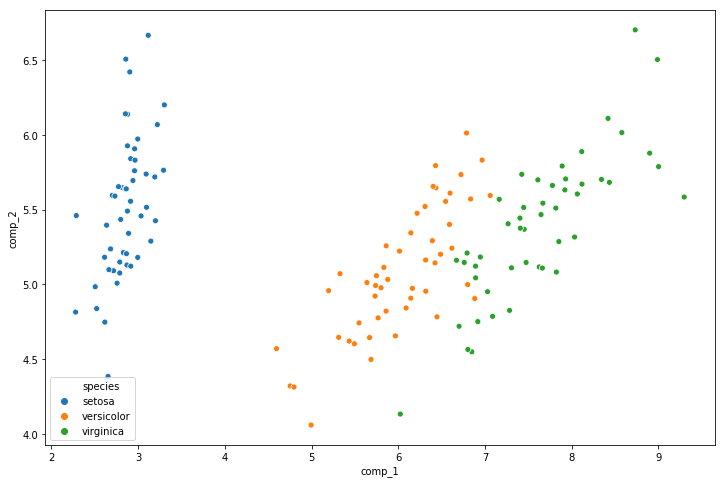

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_iris_pca['comp_1'], y=df_iris_pca['comp_2'], hue=df_iris_pca['species'])

## クラスタ未知

In [13]:
pca = PCA(n_components=2)
pca.fit(df_iris_no_label.iloc[:,0:4].values)
df_iris_no_label_pca = pd.DataFrame(np.dot(df_iris_no_label.values, pca.components_.T), columns=['comp_1', 'comp_2'])

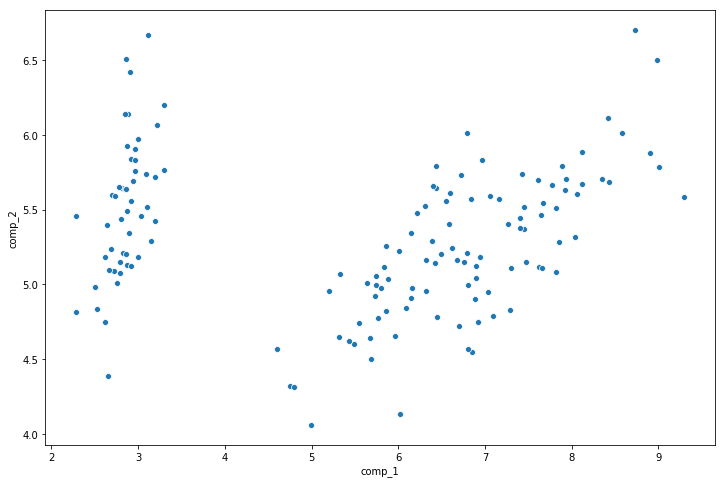

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_iris_no_label_pca['comp_1'], y=df_iris_no_label_pca['comp_2'])

## k-means

In [118]:
def from_num_to_label(x):
    if x == 1: return 'setosa'
    elif x == 0: return 'versicolor'
    else: return 'virginica'

In [119]:
array_iris_no_label = np.array(df_iris_no_label)
model = KMeans(n_clusters=3, random_state=0)
pred = model.fit_predict(array_iris_no_label)

In [120]:
df_iris_no_label_pred = pd.concat([df_iris_no_label, pd.DataFrame(pred, columns=['species_pred'])], axis=1)
df_iris_no_label_pred['species_pred_label'] = df_iris_no_label_pred['species_pred'].apply(lambda x: from_num_to_label(x))

In [121]:
df_iris_no_label_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_pred_label
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [122]:
pca = PCA(n_components=2)
pca.fit(df_iris_no_label_pred.iloc[:,0:4].values)
df_iris_pred_pca = pd.DataFrame(np.dot(df_iris_no_label_pred.iloc[:,0:4].values, pca.components_.T), columns=['comp_1', 'comp_2'])
df_iris_pred_pca = pd.concat([df_iris_pred_pca, pd.DataFrame(df_iris_no_label_pred['species_pred_label'])], axis=1)

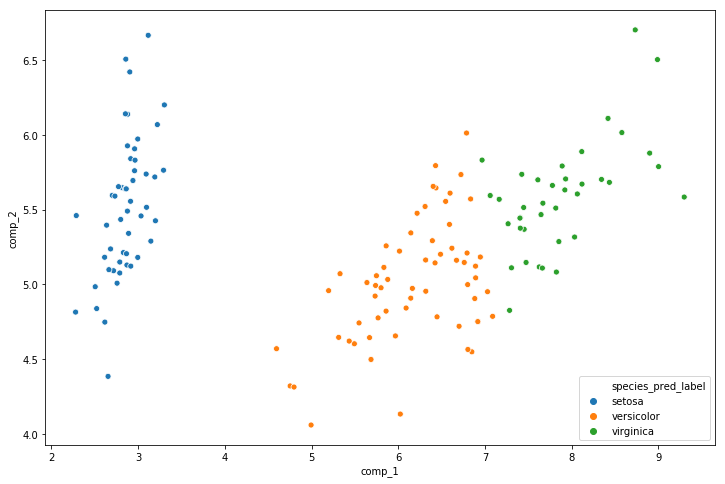

In [123]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_iris_pred_pca['comp_1'], y=df_iris_pred_pca['comp_2'], hue=df_iris_pred_pca['species_pred_label'])

## 評価
- 当てられた/外したデータのベイズ推定による確率分布を算出する

In [124]:
df_eval = pd.concat([df_iris, df_iris_no_label_pred[['species_pred_label']]], axis=1)
df_eval.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred_label
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [125]:
len(df_eval.query('species==species_pred_label')) / len(df_eval)

0.8933333333333333

In [126]:
df_eval_setosa = df_eval.query('species=="setosa"')
df_eval_setosa.query('species_pred_label!="setosa"')

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred_label


In [127]:
df_eval_versicolor = df_eval.query('species=="versicolor"')
df_eval_versicolor.query('species_pred_label!="versicolor"')

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred_label
52,6.9,3.1,4.9,1.5,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica


In [128]:
df_eval_virginica = df_eval.query('species=="virginica"')
df_eval_virginica.query('species_pred_label!="virginica"')

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred_label
101,5.8,2.7,5.1,1.9,virginica,versicolor
106,4.9,2.5,4.5,1.7,virginica,versicolor
113,5.7,2.5,5.0,2.0,virginica,versicolor
114,5.8,2.8,5.1,2.4,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor
121,5.6,2.8,4.9,2.0,virginica,versicolor
123,6.3,2.7,4.9,1.8,virginica,versicolor
126,6.2,2.8,4.8,1.8,virginica,versicolor
127,6.1,3.0,4.9,1.8,virginica,versicolor
133,6.3,2.8,5.1,1.5,virginica,versicolor
